# Step 0: Explore the dataset

In [ ]:
#!pip install pmdarima

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fecha_resultado     1116 non-null   object
 1   departamento        1116 non-null   object
 2   provincia           1116 non-null   object
 3   distrito            1116 non-null   object
 4   num_death_cases     1116 non-null   int64 
 5   num_positive_cases  1116 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 52.4+ KB


<Axes: >

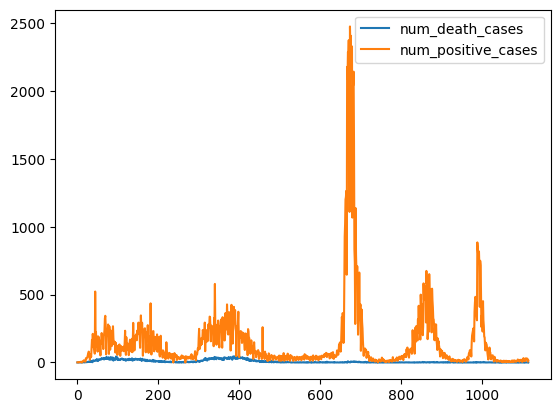

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DSA5900/LIMA_DPT_PVN_DISTRICT.csv')
df.info()

df.plot()

In [ ]:
df['fecha_resultado'] = pd.to_datetime(df['fecha_resultado'], format='%Y/%m/%d')

In [ ]:
df['Year'] = df['fecha_resultado'].dt.year
df['Month'] = df['fecha_resultado'].dt.month
df['Day'] = df['fecha_resultado'].dt.day
df['ds'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [ ]:
df.drop(['fecha_resultado', 'departamento', 'provincia', 'distrito','num_positive_cases', 'Year', 'Month', 'Day', ], axis=1, inplace= True)
df.columns = ['y', 'ds']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

In [ ]:
df['y'] = df['y'].cumsum()


<Axes: xlabel='ds'>

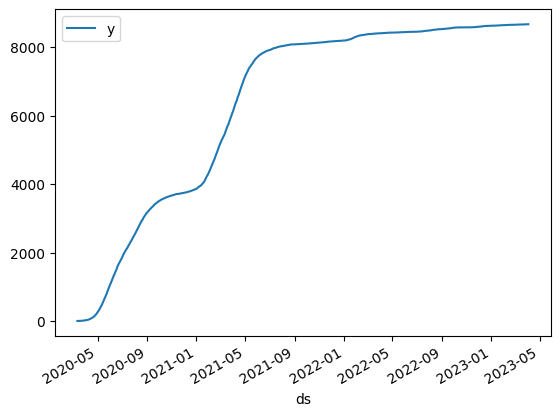

In [ ]:
import numpy as np
#df = np.log(df['y']) # don't forget to transform the data back when making real predictions

df.plot()

In [ ]:
df

,y
ds,
2020-03-12,0
2020-03-14,0
2020-03-15,0
2020-03-16,1
2020-03-17,1
...,...
2023-03-30,8671
2023-03-31,8671
2023-04-01,8671


In [ ]:
# msk = (df.index < len(df)-30)
# df_train = df[msk].copy()
# df_test = df[~msk].copy()

# Splitting the data into training and testing sets
train_size = int(len(df['y']) * 0.8)
df_train = df['y'][:train_size]
df_test = df['y'][train_size:]
len(df_test)

224

# Step 1: Check for stationarity of time series

## Method #1: time series plot

## Method #2: ACF plot and PACF plot

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


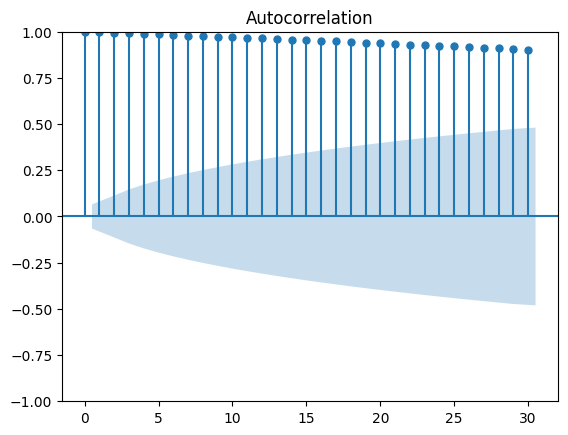

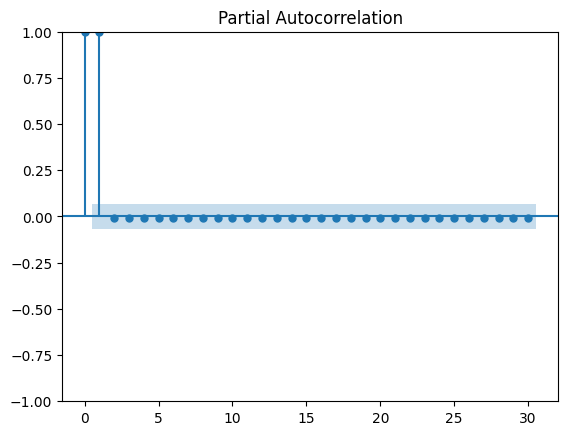

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

## Method #3: ADF test

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.04312830212675366


## Transform to stationary: differencing

In [ ]:
# df_train_diff = df_train.diff().dropna()
# df_train_diff.plot()

In [ ]:
# acf_diff = plot_acf(df_train_diff)

# pacf_diff = plot_pacf(df_train_diff)

In [ ]:
# adf_test = adfuller(df_train_diff)
# print(f'p-value: {adf_test[1]}')

# Step 2: Determine ARIMA models parameters p, q

# Step 3: Fit the ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  892
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3681.614
Date:                Thu, 27 Apr 2023   AIC                           7369.228
Time:                        07:04:07   BIC                           7383.608
Sample:                             0   HQIC                          7374.724
                                - 892                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5846.5468      0.000   2.83e+07      0.000    5846.546    5846.547
ar.L1          1.0000    1.6e-05   6.26e+04      0.000       1.000       1.000
sigma2       222.2815      8.660     25.666      0.0

# Step 4: Make time series predictions

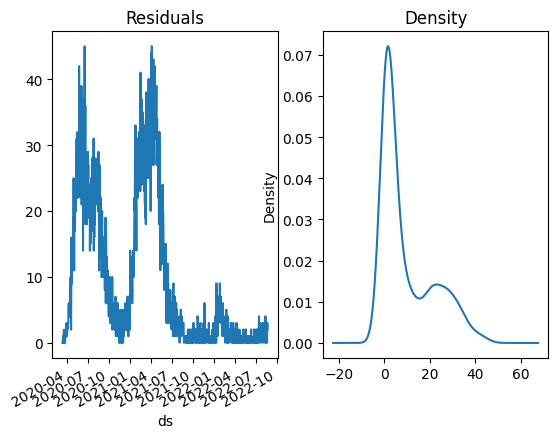

In [ ]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


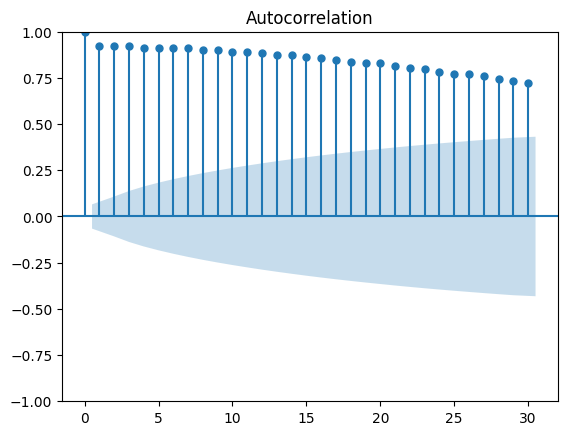

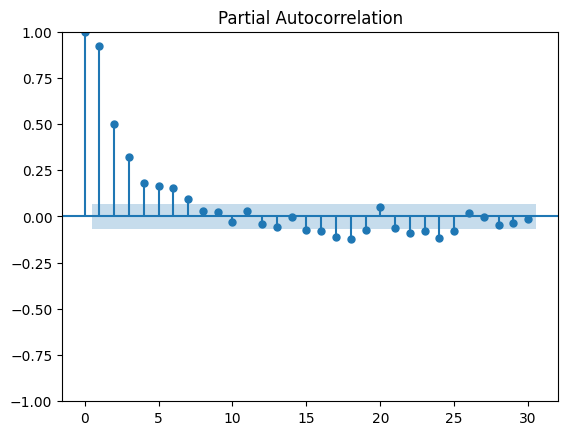

In [ ]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='ds'>

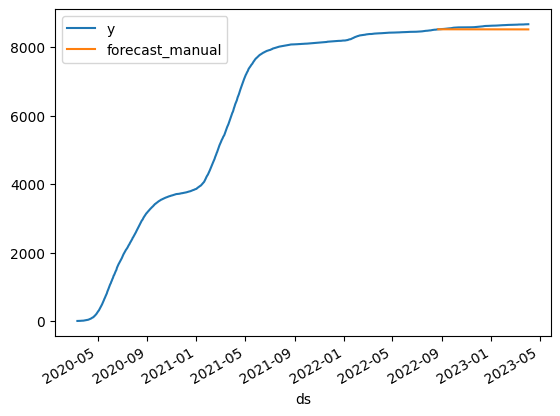

In [ ]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df.plot()

# Optional: Auto-fit the ARIMA model

In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 2, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  892
Model:               SARIMAX(1, 2, 2)   Log Likelihood               -2359.581
Date:                Thu, 27 Apr 2023   AIC                           4729.161
Time:                        07:04:26   BIC                           4753.117
Sample:                             0   HQIC                          4738.317
                                - 892                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.003      0.045      0.964      -0.006       0.006
ar.L1          0.9513      0.014     67.118      0.000       0.923       0.979
ma.L1         -1.8014      0.015   -124.051      0.000      -1.830      -1.773
ma.L2          0.8283      0.013     64.103      0.000       0.803       0.854
sigma2        11.7377      0.330     35.607      0.000      11.092      12.384
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               524.03
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Step 5: Evaluate model predictions

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: title={'center': 'Lima District Deaths Forecast'}, xlabel='Date', ylabel='Count'>

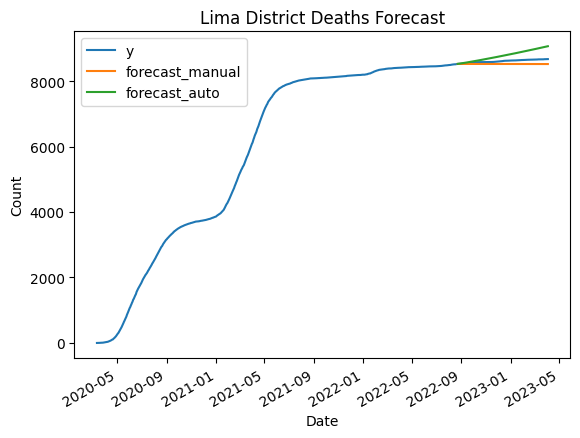

In [ ]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df.plot(title='Lima District Deaths Forecast', ylabel='Count', xlabel= 'Date')

In [ ]:
df


,y,forecast_manual,forecast_auto
ds,,,
2020-03-12,0,NaN,NaN
2020-03-14,0,NaN,NaN
2020-03-15,0,NaN,NaN
2020-03-16,1,NaN,NaN
2020-03-17,1,NaN,NaN
...,...,...,...
2023-03-30,8671,8520.780460,9054.075806
2023-03-31,8671,8520.765835,9056.847555
2023-04-01,8671,8520.751210,9059.622265


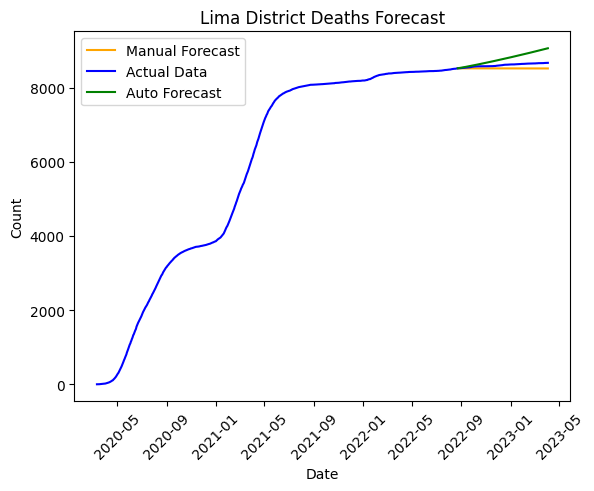

In [ ]:
plt.figure()
plt.plot(df[['forecast_manual']], c='orange', label='Manual Forecast')
plt.plot(df[['y']], c='blue', label='Actual Data')
plt.plot(df[['forecast_auto']], c='green', label='Auto Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.title("Lima District Deaths Forecast")
plt.legend()
plt.show()

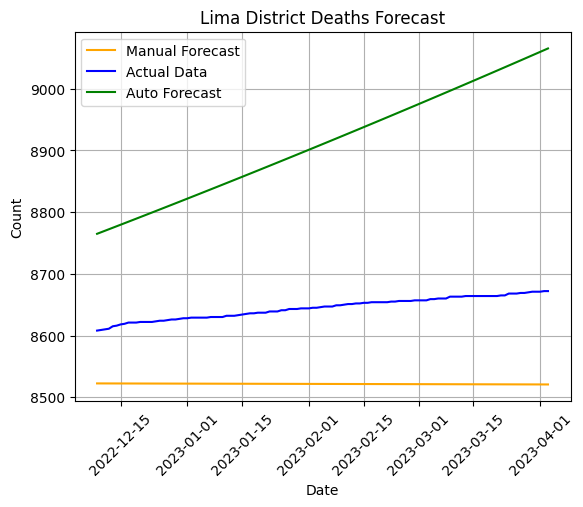

In [ ]:
plt.figure()
plt.plot(df[['forecast_manual']][-116:], c='orange', label='Manual Forecast')
plt.plot(df[['y']][-116:], c='blue', label='Actual Data')
plt.plot(df[['forecast_auto']][-116:], c='green', label='Auto Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.title("Lima District Deaths Forecast")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Arima District Deaths Error (Manual Forecast)
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

#print(df_test.mean())
print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

df_test_mean= df_test.mean()
print(f"Mean: {df_test_mean}")
print(f"RMSE percentage: {((rmse/df_test_mean)*100)}%")

mae - manual: 86.00827931540269
mape - manual: 0.00996634806712271
rmse - manual: 96.43244348642932
Mean: 8608.361607142857
RMSE percentage: 1.120218316647081%


In [ ]:
# Arima District Deaths Error (Automatic Forecast)
mae = mean_absolute_error(df_test, forecast_test_auto)
mape = mean_absolute_percentage_error(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

#print(df_test.mean())
print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

df_test_mean= df_test.mean()
print(f"Mean: {df_test_mean}")
print(f"RMSE percentage: {((rmse/df_test_mean)*100)}%")

mae - auto: 171.88220324617572
mape - auto: 0.019902523235836547
rmse - auto: 207.34257701007456
Mean: 8608.361607142857
RMSE percentage: 2.408618346585608%


# Other suggestions